In [5]:
import zipfile
zip_ref = zipfile.ZipFile("MERGED2015_16_PP.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

In [6]:
import pandas as pd
df = pd.read_csv('MERGED2015_16_PP.csv')
df.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,TRANS_4_POOLED,TRANS_L4_POOLED,DTRANS_4_POOLED,DTRANS_L4_POOLED,TRANS_4_POOLED_SUPP,TRANS_L4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,0.61638362831858,NaN,0.41664791666666,NaN,0.200384,NaN,2086.0,NaN,0.20038350910834,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.80765744125326,NaN,0.58823529411764,NaN,0.241619,NaN,2740.0,NaN,0.24161927007299,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,NaN,PrivacySuppressed,NaN,0.111111,NaN,18.0,NaN,PrivacySuppressed,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.78698579881656,NaN,0.50876842105263,NaN,0.332677,NaN,1539.0,NaN,0.33267738791423,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.58470804331013,NaN,0.43181818181818,NaN,0.000000,NaN,2539.0,NaN,0,NaN


In [7]:
dfdrop=df
dfdrop=dfdrop.dropna(axis=1, how='all') #drop null columns
dfdrop=dfdrop.drop('OPEID6', axis=1)
dfdrop=dfdrop.drop('INSTURL', axis=1)
dfdrop=dfdrop.drop('NPCURL', axis=1)
dfdrop=dfdrop.drop('ACCREDAGENCY', axis=1)
dfdrop=dfdrop.drop('ACCREDCODE', axis=1)
dfdrop=dfdrop.drop('T4APPROVALDATE', axis=1)
dfdrop=dfdrop.drop('ALIAS', axis=1)
dfdrop=dfdrop.drop(dfdrop[dfdrop['PREDDEG']==4].index) #drop graduate-degree-only institutions
dfdrop.head()

,UNITID,OPEID,INSTNM,CITY,STABBR,ZIP,HCM2,MAIN,NUMBRANCH,PREDDEG,...,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,TRANS_4_POOLED,TRANS_L4_POOLED,DTRANS_4_POOLED,DTRANS_L4_POOLED,TRANS_4_POOLED_SUPP,TRANS_L4_POOLED_SUPP
0,100654,100200,Alabama A & M University,Normal,AL,35762,0,1,1,3,...,0.61638362831858,NaN,0.41664791666666,NaN,0.200384,NaN,2086.0,NaN,0.20038350910834,NaN
1,100663,105200,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0,1,1,3,...,0.80765744125326,NaN,0.58823529411764,NaN,0.241619,NaN,2740.0,NaN,0.24161927007299,NaN
2,100690,2503400,Amridge University,Montgomery,AL,36117-3553,0,1,1,3,...,PrivacySuppressed,NaN,PrivacySuppressed,NaN,0.111111,NaN,18.0,NaN,PrivacySuppressed,NaN
3,100706,105500,University of Alabama in Huntsville,Huntsville,AL,35899,0,1,1,3,...,0.78698579881656,NaN,0.50876842105263,NaN,0.332677,NaN,1539.0,NaN,0.33267738791423,NaN
4,100724,100500,Alabama State University,Montgomery,AL,36104-0271,0,1,1,3,...,0.58470804331013,NaN,0.43181818181818,NaN,0.000000,NaN,2539.0,NaN,0,NaN


In [8]:
dfdrop.shape

(7292, 644)

In [9]:
dfdrop.to_csv('new2015.csv', index=True, header=True)

In [10]:
df15 = pd.read_csv('new2015.csv')
df15.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,489,490,491,503,517,559,560,561,562,635,636,637,638,643,644) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,UNITID,OPEID,INSTNM,CITY,STABBR,ZIP,HCM2,MAIN,NUMBRANCH,...,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,TRANS_4_POOLED,TRANS_L4_POOLED,DTRANS_4_POOLED,DTRANS_L4_POOLED,TRANS_4_POOLED_SUPP,TRANS_L4_POOLED_SUPP
0,0,100654,100200,Alabama A & M University,Normal,AL,35762,0,1,1,...,0.61638362831858,NaN,0.41664791666666,NaN,0.200384,NaN,2086.0,NaN,0.20038350910834,NaN
1,1,100663,105200,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0,1,1,...,0.80765744125326,NaN,0.58823529411764,NaN,0.241619,NaN,2740.0,NaN,0.24161927007299,NaN
2,2,100690,2503400,Amridge University,Montgomery,AL,36117-3553,0,1,1,...,PrivacySuppressed,NaN,PrivacySuppressed,NaN,0.111111,NaN,18.0,NaN,PrivacySuppressed,NaN
3,3,100706,105500,University of Alabama in Huntsville,Huntsville,AL,35899,0,1,1,...,0.78698579881656,NaN,0.50876842105263,NaN,0.332677,NaN,1539.0,NaN,0.33267738791423,NaN
4,4,100724,100500,Alabama State University,Montgomery,AL,36104-0271,0,1,1,...,0.58470804331013,NaN,0.43181818181818,NaN,0.000000,NaN,2539.0,NaN,0,NaN


In [11]:
df15.shape

(7292, 645)

In [12]:
df15.corr()

,Unnamed: 0,UNITID,OPEID,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,...,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,TRANS_4_POOLED,TRANS_L4_POOLED,DTRANS_4_POOLED,DTRANS_L4_POOLED
Unnamed: 0,1.000000,0.384203,0.270162,0.024028,-0.509841,0.224556,-0.458230,-0.454937,0.416359,0.223286,...,-0.215595,-0.291468,0.014811,-0.296754,0.235471,0.198347,-0.026108,-0.354545,-0.039394,-0.215413
UNITID,0.384203,1.000000,-0.004393,-0.021174,-0.373860,0.168795,-0.410419,-0.374335,0.108900,-0.014005,...,-0.245242,-0.310405,0.030487,-0.302057,0.255255,0.194914,-0.055792,-0.383434,-0.051847,-0.229732
OPEID,0.270162,-0.004393,1.000000,0.025037,-0.124838,0.148135,-0.092862,-0.095868,0.265746,-0.009638,...,-0.112143,-0.353316,0.016108,-0.296584,0.171737,0.175870,-0.078454,-0.433638,-0.029377,-0.265027
HCM2,0.024028,-0.021174,0.025037,1.000000,0.015959,-0.023642,-0.039837,-0.046659,0.055970,-0.033974,...,-0.033317,-0.043004,-0.012059,-0.025806,0.024897,0.034229,-0.010496,-0.041636,-0.016791,-0.026607
MAIN,-0.509841,-0.373860,-0.124838,0.015959,1.000000,-0.460826,0.302970,0.254292,-0.346102,0.008079,...,0.222855,0.168739,0.032009,0.176596,-0.113237,-0.153252,0.168369,0.222439,0.096685,0.089013
NUMBRANCH,0.224556,0.168795,0.148135,-0.023642,-0.460826,1.000000,-0.052248,-0.014859,0.247821,-0.008739,...,-0.135932,-0.086873,0.033367,-0.088487,0.122563,0.114267,-0.167793,-0.127554,-0.040898,-0.065049
PREDDEG,-0.458230,-0.410419,-0.092862,-0.039837,0.302970,-0.052248,1.000000,0.915362,-0.358565,0.058265,...,0.208102,0.420006,0.034493,0.312009,-0.145744,0.087542,0.129694,0.557158,0.075435,0.285416
HIGHDEG,-0.454937,-0.374335,-0.095868,-0.046659,0.254292,-0.014859,0.915362,1.000000,-0.338218,0.041165,...,0.280658,0.418094,0.066476,0.361949,-0.130721,0.097202,0.001851,0.538747,0.123734,0.338159
CONTROL,0.416359,0.108900,0.265746,0.055970,-0.346102,0.247821,-0.358565,-0.338218,1.000000,-0.041435,...,-0.489117,-0.447191,-0.015752,-0.382516,0.291409,0.432040,-0.280626,-0.586289,-0.174882,-0.305236
ST_FIPS,0.223286,-0.014005,-0.009638,-0.033974,0.008079,-0.008739,0.058265,0.041165,-0.041435,1.000000,...,-0.040196,-0.020560,-0.037045,-0.110466,-0.023650,0.051637,0.033129,-0.015545,-0.045032,-0.008707


# DATAFRAME TO ANALYZE MARYLAND DATA

In [13]:
df16 = df15[(df15['ST_FIPS'] == 24)]
df16.head()

,Unnamed: 0,UNITID,OPEID,INSTNM,CITY,STABBR,ZIP,HCM2,MAIN,NUMBRANCH,...,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,TRANS_4_POOLED,TRANS_L4_POOLED,DTRANS_4_POOLED,DTRANS_L4_POOLED,TRANS_4_POOLED_SUPP,TRANS_L4_POOLED_SUPP
1428,1505,161615,3064900,Aaron's Academy of Beauty,Waldorf,MD,20602,0,1,1,...,NaN,0.8,NaN,PrivacySuppressed,NaN,0.000000,NaN,87.0,NaN,0
1429,1506,161651,3097200,Aesthetics Institute of Cosmetology,Gaithersburg,MD,20877,0,1,1,...,NaN,0.70589411764705,NaN,0.675005,NaN,0.209281,NaN,43.0,NaN,0.20928139534883
1430,1507,161688,205700,Allegany College of Maryland,Cumberland,MD,21502-2596,0,1,1,...,NaN,0.5924440140845,NaN,0.43885323741007,NaN,0.114237,NaN,893.0,NaN,0.11423740201567
1431,1508,161767,205800,Anne Arundel Community College,Arnold,MD,21012-1895,0,1,1,...,NaN,0.67405686339522,NaN,0.49326653883029,NaN,0.301058,NaN,3514.0,NaN,0.3010577973819
1432,1509,161776,1041000,Brightwood College-Towson,Towson,MD,21286-2201,0,1,1,...,NaN,0.61144140127388,NaN,NaN,NaN,0.000000,NaN,522.0,NaN,0


In [14]:
dfMD = df16[['INSTNM','CONTROL','OPEID','ICLEVEL','RPY_3YR_N','RPY_3YR_RT','COMPL_RPY_3YR_RT','NONCOM_RPY_3YR_RT','NOPELL_RPY_3YR_RT','PELL_RPY_3YR_RT','LO_INC_RPY_3YR_RT','MD_INC_RPY_3YR_RT','HI_INC_RPY_3YR_RT','FIRSTGEN_RPY_3YR_RT','NOTFIRSTGEN_RPY_3YR_RT' ]]
dfMD

,INSTNM,CONTROL,OPEID,ICLEVEL,RPY_3YR_N,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,NOPELL_RPY_3YR_RT,PELL_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,FIRSTGEN_RPY_3YR_RT,NOTFIRSTGEN_RPY_3YR_RT
1428,Aaron's Academy of Beauty,3,3064900,3,62,0.2096774194,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
1429,Aesthetics Institute of Cosmetology,3,3097200,3,62,0.4516129032,0.53125,0.3666666667,PrivacySuppressed,PrivacySuppressed,0.46,PrivacySuppressed,PrivacySuppressed,0.4146341463,0.5238095238
1430,Allegany College of Maryland,1,205700,2,1591,0.4418604651,0.6254752852,0.3511737089,0.6174496644,0.3732517483,0.3170731707,0.53784219,0.5818965517,0.4408725603,0.4430555556
1431,Anne Arundel Community College,1,205800,2,3782,0.3921205711,0.6394230769,0.3432552248,0.5492689129,0.2802172929,0.2996613995,0.4379811805,0.5231866825,0.3676307008,0.4143145161
1432,Brightwood College-Towson,3,1041000,2,667,0.1694152924,0.2239467849,0.0555555556,0.4406779661,0.1430921053,0.1462962963,0.2156862745,0.48,0.1682464455,0.1714285714
1433,Award Beauty School,3,826300,3,463,0.1663066955,0.2916666667,0.1518072289,0.3928571429,0.1517241379,0.1394736842,PrivacySuppressed,PrivacySuppressed,0.1824104235,0.1346153846
1434,Baltimore Studio of Hair Design,3,2494700,3,181,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
1435,Baltimore City Community College,1,206100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,University of Baltimore,1,210200,1,1637,0.4496029322,0.5934579439,0.3567839196,0.5788461538,0.3894359893,0.3911483254,0.4644128114,0.6192468619,0.4315514993,0.4655172414
1437,Bowie State University,1,206200,1,2328,0.2852233677,0.275,0.2854020979,0.3447820343,0.2565245067,0.2594718714,0.2840778923,0.3253424658,0.2833158447,0.2865454545


In [15]:
#Total number of Maryland cohorts in 3 year repayment
dfMD.dropna(inplace=True)
dfMD.fillna(0, inplace=True)
dfMD['RPY_3YR_N'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['COMPL_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['NONCOM_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['NOPELL_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['PELL_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['LO_INC_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['MD_INC_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['HI_INC_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['FIRSTGEN_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['NOTFIRSTGEN_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)
dfMD['RPY_3YR_N'] = dfMD['RPY_3YR_N'].astype("int")
dfMD['RPY_3YR_RT'] = dfMD['RPY_3YR_RT'].astype("float")
dfMD['COMPL_RPY_3YR_RT'] = dfMD['COMPL_RPY_3YR_RT'].astype(float)
dfMD['NONCOM_RPY_3YR_RT'] = dfMD['NONCOM_RPY_3YR_RT'].astype(float)
dfMD['NOPELL_RPY_3YR_RT'] = dfMD['NOPELL_RPY_3YR_RT'].astype(float)
dfMD['PELL_RPY_3YR_RT'] = dfMD['PELL_RPY_3YR_RT'].astype(float)
dfMD['LO_INC_RPY_3YR_RT'] = dfMD['LO_INC_RPY_3YR_RT'].astype(float)
dfMD['MD_INC_RPY_3YR_RT'] = dfMD['MD_INC_RPY_3YR_RT'].astype(float)
dfMD['HI_INC_RPY_3YR_RT'] = dfMD['HI_INC_RPY_3YR_RT'].astype(float)
dfMD['FIRSTGEN_RPY_3YR_RT'] = dfMD['FIRSTGEN_RPY_3YR_RT'].astype(float)
dfMD['NOTFIRSTGEN_RPY_3YR_RT'] = dfMD['NOTFIRSTGEN_RPY_3YR_RT'].astype(float)
dfMD

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/n

,INSTNM,CONTROL,OPEID,ICLEVEL,RPY_3YR_N,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,NOPELL_RPY_3YR_RT,PELL_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,FIRSTGEN_RPY_3YR_RT,NOTFIRSTGEN_RPY_3YR_RT
1428,Aaron's Academy of Beauty,3,3064900,3,62,0.209677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1429,Aesthetics Institute of Cosmetology,3,3097200,3,62,0.451613,0.531250,0.366667,0.000000,0.000000,0.460000,0.000000,0.000000,0.414634,0.523810
1430,Allegany College of Maryland,1,205700,2,1591,0.441860,0.625475,0.351174,0.617450,0.373252,0.317073,0.537842,0.581897,0.440873,0.443056
1431,Anne Arundel Community College,1,205800,2,3782,0.392121,0.639423,0.343255,0.549269,0.280217,0.299661,0.437981,0.523187,0.367631,0.414315
1432,Brightwood College-Towson,3,1041000,2,667,0.169415,0.223947,0.055556,0.440678,0.143092,0.146296,0.215686,0.480000,0.168246,0.171429
1433,Award Beauty School,3,826300,3,463,0.166307,0.291667,0.151807,0.392857,0.151724,0.139474,0.000000,0.000000,0.182410,0.134615
1434,Baltimore Studio of Hair Design,3,2494700,3,181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1436,University of Baltimore,1,210200,1,1637,0.449603,0.593458,0.356784,0.578846,0.389436,0.391148,0.464413,0.619247,0.431551,0.465517
1437,Bowie State University,1,206200,1,2328,0.285223,0.275000,0.285402,0.344782,0.256525,0.259472,0.284078,0.325342,0.283316,0.286545
1438,Capitol Technology University,2,143600,1,123,0.601626,0.708333,0.533333,0.736842,0.484848,0.478261,0.000000,0.000000,0.727273,0.500000


# STATISTICAL ANALYSIS ON MARYLAND DATA

In [16]:
dfMD['RPY_3YR_N'].sum() #total number of MD cohorts in 3 year payment

827052

In [17]:
dfMD['RPY_3YR_RT'].mean() # Average 3 year payment rate for MD institutions

0.39615375540113634

In [18]:
dfMD['RPY_3YR_RT'].median() #The median is close to the mean which indicates that the data is not very skewed

0.35768732940000003

In [19]:
dfMD['RPY_3YR_RT'].mode() #Most common value is zero. There are only 8 institutions majority small private for profit with zero values. I don't think this will skew the data tremendously.

0    0.0
dtype: float64

In [20]:
dfMD['RPY_3YR_RT'].max() # Highest 3 year payment rate for MD institutions

0.8524173028

In [21]:
dfMD['RPY_3YR_RT'].std() # A low SD indicates the values are closer to the average

0.24055570715697977

In [22]:
dfMD['RPY_3YR_RT'].quantile(.25) #75% scored above this RPY_RT


0.23292654915000002

In [23]:
dfMD['RPY_3YR_RT'].quantile(.75) #25% scored above this RPY_RT

0.604606609

In [24]:
dfMD['RPY_3YR_RT'].quantile(.5) #95% scored above this RPY_RT

0.35768732940000003

In [25]:
dfMD.corr()

,CONTROL,OPEID,ICLEVEL,RPY_3YR_N,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,NOPELL_RPY_3YR_RT,PELL_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,FIRSTGEN_RPY_3YR_RT,NOTFIRSTGEN_RPY_3YR_RT
CONTROL,1.000000,0.362076,0.544147,0.176350,-0.391553,-0.580627,-0.547348,-0.456554,-0.557158,-0.411546,-0.534960,-0.427652,-0.474652,-0.448951
OPEID,0.362076,1.000000,0.137739,0.850147,-0.176681,-0.232436,-0.248099,-0.178216,-0.244146,-0.189772,-0.190947,-0.134018,-0.221361,-0.202787
ICLEVEL,0.544147,0.137739,1.000000,-0.250702,-0.346416,-0.547064,-0.529168,-0.537605,-0.607004,-0.391756,-0.567732,-0.564478,-0.449877,-0.437955
RPY_3YR_N,0.176350,0.850147,-0.250702,1.000000,-0.131921,-0.025334,-0.080807,0.028084,-0.061081,-0.116853,0.006079,0.084992,-0.099633,-0.093257
RPY_3YR_RT,-0.391553,-0.176681,-0.346416,-0.131921,1.000000,0.774556,0.830846,0.657115,0.785234,0.925163,0.668104,0.575593,0.872226,0.882972
COMPL_RPY_3YR_RT,-0.580627,-0.232436,-0.547064,-0.025334,0.774556,1.000000,0.949169,0.858836,0.888537,0.802788,0.832302,0.773499,0.907069,0.888831
NONCOM_RPY_3YR_RT,-0.547348,-0.248099,-0.529168,-0.080807,0.830846,0.949169,1.000000,0.820423,0.918416,0.860157,0.797803,0.712371,0.925752,0.919470
NOPELL_RPY_3YR_RT,-0.456554,-0.178216,-0.537605,0.028084,0.657115,0.858836,0.820423,1.000000,0.928608,0.672737,0.902808,0.901709,0.788446,0.765425
PELL_RPY_3YR_RT,-0.557158,-0.244146,-0.607004,-0.061081,0.785234,0.888537,0.918416,0.928608,1.000000,0.801983,0.919269,0.857024,0.871831,0.855967
LO_INC_RPY_3YR_RT,-0.411546,-0.189772,-0.391756,-0.116853,0.925163,0.802788,0.860157,0.672737,0.801983,1.000000,0.682563,0.596296,0.901457,0.903044


# Top 10 four-year MD Institution with the highest 3 year re-payment rate

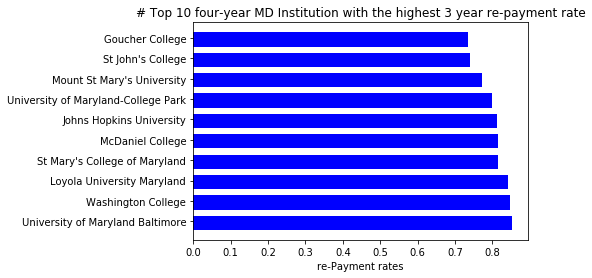

In [42]:
# Top 10 four-year MD Institution with the highest 3 year re-payment rate
import matplotlib.pyplot as plt
import numpy as np

dfbargraph = dfMD.sort_values(["ICLEVEL", "RPY_3YR_RT"], ascending= [1, False]).head(10)
dfbargraph

x = dfbargraph['INSTNM']
y = dfbargraph['RPY_3YR_RT']

fig, ax = plt.subplots()    
width = 0.7 # the width of the bars 
ind = np.arange(len(x)) 
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x, minor=False)
plt.title('# Top 10 four-year MD Institution with the highest 3 year re-payment rate')
plt.xlabel('re-Payment rates')
plt.show()

In [27]:
dfbargraph.to_csv('MD_top10.csv', index=True, header=True)

# Regression Analysis w/ Institution as the dependent variable

In [43]:
import statsmodels.formula.api as sm
result = sm.ols(formula='CONTROL ~ RPY_3YR_RT + COMPL_RPY_3YR_RT + NONCOM_RPY_3YR_RT + LO_INC_RPY_3YR_RT + HI_INC_RPY_3YR_RT + FIRSTGEN_RPY_3YR_RT + NOTFIRSTGEN_RPY_3YR_RT -1', data=dfMD).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CONTROL   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     18.55
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           1.60e-14
Time:                        16:56:12   Log-Likelihood:                -160.00
No. Observations:                  88   AIC:                             334.0
Df Residuals:                      81   BIC:                             351.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
RPY_3YR_RT                 5.8626      1.769      3.314      0.001       2.343       9.382
COMPL_RPY_3YR_RT           3.8404      2.099      1.830      0.071      -0.336       8.017
NONCOM_RPY_3YR_RT         -9.5193      2.755     -3.455      0.001     -15.001      -4.038
LO_INC_RPY_3YR_RT         -1.5020      2.375     -0.632      0.529      -6.228       3.224
HI_INC_RPY_3YR_RT          1.1798      0.908      1.299      0.197      -0.627       2.986
FIRSTGEN_RPY_3YR_RT        0.9909      3.366      0.294      0.769      -5.707       7.689
NOTFIRSTGEN_RPY_3YR_RT     0.0537      2.980      0.018      0.986      -5.876       5.984
==============================================================================
Omnibus:                       21.572   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.043
Skew:                           0.139   Prob(JB):                       0.0803
Kurtosis:                       1.860   Cond. No.                         30.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# How Maryland 4YR private non-profit schools performed in the 3 year RPY_RT category

In [29]:
dfpr = dfMD[(dfMD['CONTROL'] == 2) & (dfMD['ICLEVEL'] == 1) ]
dfprgraph = dfpr.sort_values(["CONTROL", "RPY_3YR_RT"], ascending= [2, False]).head(100)
dfprgraph

#Washington College has the highest overall 3YR_RPY_RT among all 4 year MD private non-profit institutions. 

#Johns Hopkins University has the highest 3YR_RPY_RT among students from low income families. This could indicate alot of factors. 
#1. There are graduating with low loan amounts due to receiving scholarships
#2. They receive high paying jobs that will ensure they pay their loans when the time comes

#Washington Adventist University had the lowest 3YR_RPY_RT overall and also among students from low income families.

,INSTNM,CONTROL,OPEID,ICLEVEL,RPY_3YR_N,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,NOPELL_RPY_3YR_RT,PELL_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,FIRSTGEN_RPY_3YR_RT,NOTFIRSTGEN_RPY_3YR_RT
1485,Washington College,2,210800,1,462,0.846320,0.901316,0.740506,0.878613,0.750000,0.698113,0.827273,0.879599,0.753247,0.864935
1459,Loyola University Maryland,2,207800,1,1114,0.841113,0.869469,0.719048,0.871795,0.755932,0.728814,0.808429,0.870748,0.814815,0.845588
1486,McDaniel College,2,210900,1,686,0.814869,0.864198,0.743772,0.853659,0.757246,0.711864,0.805310,0.856725,0.787709,0.824458
1456,Johns Hopkins University,2,207700,1,1700,0.811765,0.831037,0.728972,0.835659,0.736585,0.791457,0.777528,0.838973,0.695279,0.830266
1471,Mount St Mary's University,2,208600,1,691,0.772793,0.845783,0.663043,0.847826,0.623377,0.615385,0.704918,0.851662,0.710227,0.794175
1481,St John's College,2,209200,1,184,0.739130,0.813559,0.606061,0.819149,0.655556,0.575000,0.753846,0.810127,0.560000,0.767296
1449,Goucher College,2,207300,1,514,0.735409,0.838129,0.614407,0.812121,0.597826,0.462963,0.744828,0.842912,0.533333,0.769932
1453,Hood College,2,207600,1,694,0.734870,0.806316,0.579909,0.781768,0.683735,0.651515,0.743842,0.784983,0.761682,0.722917
1465,Maryland Institute College of Art,2,208000,1,738,0.715447,0.811816,0.558719,0.792411,0.596552,0.614458,0.703125,0.765789,0.660870,0.725522
1484,Stevenson University,2,210700,1,1550,0.613548,0.787049,0.427041,0.742424,0.478892,0.405000,0.596457,0.757009,0.577882,0.638767


In [30]:
dfprgraph.describe()

,CONTROL,OPEID,ICLEVEL,RPY_3YR_N,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,NOPELL_RPY_3YR_RT,PELL_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,FIRSTGEN_RPY_3YR_RT,NOTFIRSTGEN_RPY_3YR_RT
count,15.0,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2.0,199286.733333,1.0,649.533333,0.612374,0.684343,0.513571,0.673763,0.529146,0.502176,0.563285,0.626933,0.573174,0.614323
std,0.0,24405.487031,0.0,502.894744,0.276632,0.294338,0.240642,0.292299,0.246599,0.240830,0.310787,0.340586,0.255244,0.285935
min,2.0,135201.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,207000.000000,1.0,323.000000,0.584459,0.696003,0.438777,0.702837,0.467044,0.426727,0.491858,0.572730,0.546667,0.533582
50%,2.0,207800.000000,1.0,686.000000,0.734870,0.811816,0.579909,0.792411,0.597826,0.575000,0.704918,0.784983,0.660870,0.725522
75%,2.0,208950.000000,1.0,719.000000,0.792279,0.841956,0.691046,0.841743,0.710160,0.674814,0.765687,0.847287,0.740260,0.809316
max,2.0,210900.000000,1.0,1700.000000,0.846320,0.901316,0.743772,0.878613,0.757246,0.791457,0.827273,0.879599,0.814815,0.864935


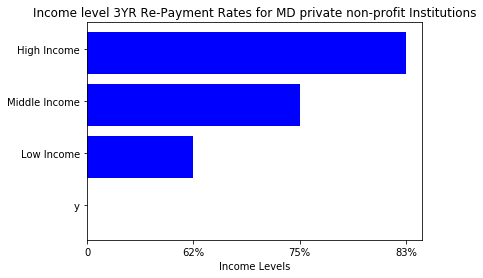

In [31]:
x = ['y', 'Low Income', 'Middle Income', 'High Income'] # Bar graph depicting 3YR Re-payment rate based on income level for Maryland private non-profit schools.
y = ['0', '62%', '75%', '83%']

fig, ax = plt.subplots()    
width = 0.8 # the width of the bars 
ind = np.arange(len(x)) 
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x, minor=False)
plt.title('Income level 3YR Re-Payment Rates for MD private non-profit Institutions')
plt.xlabel('Income Levels')
plt.show()

In [32]:
dfprgraph.to_csv('Private_3YR.csv', index=True, header=True)

# How Maryland 4YR public schools performed in the 3 year RPY_RT category# 

In [33]:
dfpub = dfMD[(dfMD['CONTROL'] == 1) & (dfMD['ICLEVEL'] == 1) ]
dfpubgraph = dfpub.sort_values(["CONTROL", "RPY_3YR_RT"], ascending= [1, False]).head(100)
dfpubgraph

#University of Maryland Baltimore is a medical professional school for students expanding their education in the healthcare field.Majority of the students are usually working 
#and therefore pay their way through school and/or have guaranteed jobs upon graduation thus making payments on time.

#University of Maryland, CP has the highest 3YR_RPY_RT for low income earners after UMD-Baltimore. This could indicate that students from low income families are getting employed upon graduation thus
#paying off their student debt at high rates.

#Univeristy of Maryland, CP has the highest 3YR_RPY_RT for first generation students after UMB-Baltimore. This could indicate that first generation students are getting employed 
# and paying off their student debt at a high rate compared to other institutions.

# PBIs/HBCUs placed at the bottom four in all categories of 3YR_RPY_RT



,INSTNM,CONTROL,OPEID,ICLEVEL,RPY_3YR_N,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,NOPELL_RPY_3YR_RT,PELL_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,FIRSTGEN_RPY_3YR_RT,NOTFIRSTGEN_RPY_3YR_RT
1462,University of Maryland Baltimore,1,210400,1,393,0.852417,0.887906,0.629630,0.883333,0.803922,0.802721,0.854839,0.909836,0.817391,0.866906
1480,St Mary's College of Maryland,1,209500,1,563,0.815275,0.854271,0.721212,0.857895,0.726776,0.650000,0.784722,0.867257,0.739837,0.836364
1464,University of Maryland-College Park,1,210300,1,7069,0.797708,0.857826,0.685703,0.842731,0.740527,0.707888,0.791626,0.839119,0.762800,0.807456
1483,Towson University,1,209900,1,6141,0.692558,0.763419,0.566516,0.756332,0.611604,0.576923,0.672854,0.759290,0.656997,0.709291
1479,Salisbury University,1,209100,1,2832,0.680085,0.764773,0.544536,0.741566,0.593003,0.547504,0.686642,0.734752,0.675325,0.682390
1463,University of Maryland-Baltimore County,1,210500,1,3248,0.673337,0.789293,0.579006,0.738372,0.614118,0.567288,0.685509,0.742552,0.649563,0.682676
1447,Frostburg State University,1,207200,1,2034,0.591937,0.685714,0.484721,0.681911,0.507619,0.424850,0.605263,0.682657,0.557107,0.613965
1436,University of Baltimore,1,210200,1,1637,0.449603,0.593458,0.356784,0.578846,0.389436,0.391148,0.464413,0.619247,0.431551,0.465517
1461,University of Maryland-University College,1,1164400,1,11722,0.396775,0.600753,0.387097,0.499438,0.333975,0.329170,0.438782,0.520274,0.392054,0.400966
1437,Bowie State University,1,206200,1,2328,0.285223,0.275000,0.285402,0.344782,0.256525,0.259472,0.284078,0.325342,0.283316,0.286545


In [34]:
dfpubgraph.describe()

,CONTROL,OPEID,ICLEVEL,RPY_3YR_N,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,NOPELL_RPY_3YR_RT,PELL_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,FIRSTGEN_RPY_3YR_RT,NOTFIRSTGEN_RPY_3YR_RT
count,13.0,1.300000e+01,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1.0,2.825692e+05,1.0,3510.076923,0.533665,0.627905,0.447691,0.603837,0.477851,0.451632,0.538423,0.609774,0.511615,0.543433
std,0.0,2.649615e+05,0.0,3138.343976,0.237553,0.219667,0.191414,0.225050,0.219667,0.205366,0.230039,0.229382,0.222201,0.242313
min,1.0,2.062000e+05,1.0,393.000000,0.221640,0.275000,0.178783,0.289885,0.198740,0.191176,0.216802,0.286908,0.210383,0.228644
25%,1.0,2.083000e+05,1.0,1814.000000,0.285223,0.418224,0.285402,0.344782,0.256525,0.259472,0.288809,0.331395,0.283316,0.286545
50%,1.0,2.099000e+05,1.0,2328.000000,0.591937,0.685714,0.484721,0.681911,0.507619,0.424850,0.605263,0.682657,0.557107,0.613965
75%,1.0,2.104000e+05,1.0,3817.000000,0.692558,0.789293,0.579006,0.756332,0.614118,0.576923,0.686642,0.759290,0.675325,0.709291
max,1.0,1.164400e+06,1.0,11722.000000,0.852417,0.887906,0.721212,0.883333,0.803922,0.802721,0.854839,0.909836,0.817391,0.866906


In [35]:
dfpubgraph.to_csv('Public_3YR.csv', index=True, header=True)

# 3 YR_RPY_RT for women and men who attended private non-profit Institutions in MD

In [36]:
dfsex = df16[['INSTNM','CONTROL', 'ICLEVEL', 'FEMALE_RPY_3YR_RT', 'MALE_RPY_3YR_RT']]  #select columns
dfsex1 = dfsex[(dfsex['CONTROL'] == 2) & (dfsex['ICLEVEL'] == 1) & (dfsex['FEMALE_RPY_3YR_RT']) & (dfsex['MALE_RPY_3YR_RT'])]  

dfsex1['FEMALE_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True) #Replace privacysuppressed with 0 value
dfsex1['MALE_RPY_3YR_RT'].replace('PrivacySuppressed', 0,inplace=True)

dfsex1['FEMALE_RPY_3YR_RT'] = dfsex1['FEMALE_RPY_3YR_RT'].astype(float) # change columns from objects to floats
dfsex1['MALE_RPY_3YR_RT'] = dfsex1['MALE_RPY_3YR_RT'].astype(float)
dfsex1

#Re-payment rates for Men and women who attended 4year private institutions in MD were almost the same.


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,INSTNM,CONTROL,ICLEVEL,FEMALE_RPY_3YR_RT,MALE_RPY_3YR_RT
1438,Capitol Technology University,2,1,0.478261,0.630000
1442,Washington Adventist University,2,1,0.418067,0.334821
1449,Goucher College,2,1,0.750708,0.701863
1453,Hood College,2,1,0.732919,0.739336
1456,Johns Hopkins University,2,1,0.817801,0.804027
1459,Loyola University Maryland,2,1,0.830046,0.857143
1465,Maryland Institute College of Art,2,1,0.737575,0.668085
1471,Mount St Mary's University,2,1,0.760705,0.789116
1472,Ner Israel Rabbinical College,2,1,0.000000,0.000000
1474,Notre Dame of Maryland University,2,1,0.568841,0.542857


In [37]:
dfsex1.describe()

,CONTROL,ICLEVEL,FEMALE_RPY_3YR_RT,MALE_RPY_3YR_RT
count,15.0,15.0,15.000000,15.000000
mean,2.0,1.0,0.610415,0.601872
std,0.0,0.0,0.279184,0.279434
min,2.0,1.0,0.000000,0.000000
25%,2.0,1.0,0.523551,0.570467
50%,2.0,1.0,0.737575,0.688889
75%,2.0,1.0,0.799096,0.796571
max,2.0,1.0,0.841751,0.857143


In [38]:
dfsex1.to_csv('Private_Sex.csv', index=True, header=True)

# 3 YR_RPY_RT for women and men who attended public Institutions in MD

In [39]:
dfsex2 = dfsex[(dfsex['CONTROL'] == 1) & (dfsex['ICLEVEL'] == 1) & (dfsex['FEMALE_RPY_3YR_RT']) & (dfsex['MALE_RPY_3YR_RT'])] 
dfsex2['FEMALE_RPY_3YR_RT'] = dfsex2['FEMALE_RPY_3YR_RT'].astype(float) # change columns from objects to floats
dfsex2['MALE_RPY_3YR_RT'] = dfsex2['MALE_RPY_3YR_RT'].astype(float)
dfsex2

##Re-payment rates for Men and women who attended 4year public institutions in MD were almost the same.
#HBCUs/PBIs recorded the lowest 3YR_RPY_RTs for both men and women

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,INSTNM,CONTROL,ICLEVEL,FEMALE_RPY_3YR_RT,MALE_RPY_3YR_RT
1436,University of Baltimore,1,1,0.415094,0.504762
1437,Bowie State University,1,1,0.302685,0.254177
1443,Coppin State University,1,1,0.242578,0.279446
1447,Frostburg State University,1,1,0.574899,0.608031
1461,University of Maryland-University College,1,1,0.381754,0.427861
1462,University of Maryland Baltimore,1,1,0.868502,0.772727
1463,University of Maryland-Baltimore County,1,1,0.626082,0.720245
1464,University of Maryland-College Park,1,1,0.785269,0.810116
1466,University of Maryland Eastern Shore,1,1,0.207407,0.262836
1470,Morgan State University,1,1,0.223881,0.218769


In [40]:
dfsex2.describe()

,CONTROL,ICLEVEL,FEMALE_RPY_3YR_RT,MALE_RPY_3YR_RT
count,13.0,13.0,13.000000,13.000000
mean,1.0,1.0,0.521869,0.545852
std,0.0,0.0,0.236820,0.232662
min,1.0,1.0,0.207407,0.218769
25%,1.0,1.0,0.302685,0.279446
50%,1.0,1.0,0.574899,0.608031
75%,1.0,1.0,0.681223,0.720245
max,1.0,1.0,0.868502,0.845133


In [41]:
dfsex2.to_csv('Public_Sex.csv', index=True, header=True)